## Analyzing calender.csv

In [93]:
# Data
import pandas as pd
import datetime as dt

# Modeling
from fbprophet import Prophet
from datetime import date
import holidays
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from fbprophet.plot import plot_plotly
import plotly.offline as py

# Saving
import pickle

In [7]:
cal = pd.read_csv("data/calendar-3.csv")
cal.head(100)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19812,2019-12-05,f,$105.00,$105.00,3.0,90.0
1,2595,2019-12-06,f,$175.00,$175.00,10.0,1125.0
2,2595,2019-12-07,f,$175.00,$175.00,10.0,1125.0
3,2595,2019-12-08,f,$175.00,$175.00,10.0,1125.0
4,2595,2019-12-09,f,$175.00,$175.00,10.0,1125.0
...,...,...,...,...,...,...,...
95,2595,2020-03-09,t,$175.00,$175.00,10.0,1125.0
96,2595,2020-03-10,t,$175.00,$175.00,10.0,1125.0
97,2595,2020-03-11,t,$175.00,$175.00,10.0,1125.0
98,2595,2020-03-12,t,$175.00,$175.00,10.0,1125.0


In [13]:
cal.tail(100)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
18470056,40584021,2020-08-26,f,100.0,100.0,9.0,1125.0
18470057,40584021,2020-08-27,f,100.0,100.0,9.0,1125.0
18470058,40584021,2020-08-28,f,100.0,100.0,9.0,1125.0
18470059,40584021,2020-08-29,f,100.0,100.0,9.0,1125.0
18470060,40584021,2020-08-30,f,100.0,100.0,9.0,1125.0
...,...,...,...,...,...,...,...
18470151,40584021,2020-11-29,f,100.0,100.0,9.0,1125.0
18470152,40584021,2020-11-30,f,100.0,100.0,9.0,1125.0
18470153,40584021,2020-12-01,f,100.0,100.0,9.0,1125.0
18470154,40584021,2020-12-02,f,100.0,100.0,9.0,1125.0


In [8]:
print(len(cal.index))
cal=cal.dropna()

18470156


In [9]:
def get_float(x,s):
    x = str(x)
    n_x = x.strip(s)
    return float(n_x)

In [10]:
cal['price'] = cal['price'].apply(lambda x: get_float(x.replace(',',''),'$'))
cal['adjusted_price'] = cal['adjusted_price'].apply(lambda x: get_float(x.replace(',',''),'$'))

### Plotting the different prices over the year

In [11]:
cal_listing_id_grp = cal.groupby(['listing_id'])

listing_id:  2595
difference in price and adjusted price:  0
max:  226.0
mean:  196.4153005464481
min:  175.0


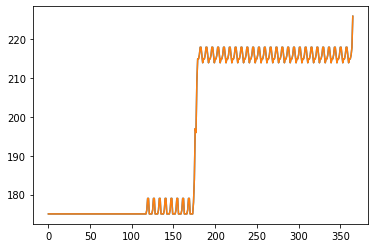

listing_id:  3831
difference in price and adjusted price:  0
max:  95.0
mean:  86.22465753424657
min:  85.0


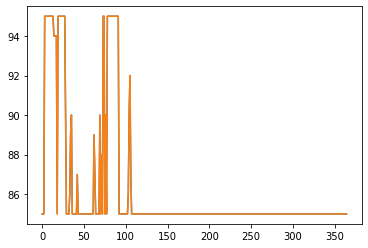

listing_id:  5099
difference in price and adjusted price:  0
max:  400.0
mean:  206.16438356164383
min:  200.0


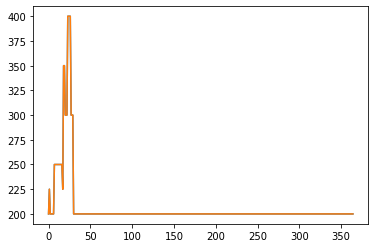

listing_id:  5121
difference in price and adjusted price:  0
max:  60.0
mean:  60.0
min:  60.0


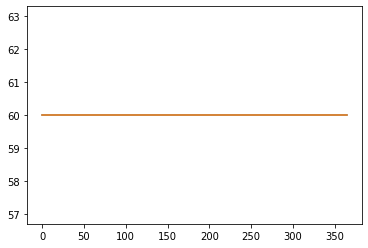

listing_id:  5178
difference in price and adjusted price:  0
max:  79.0
mean:  78.27945205479452
min:  71.0


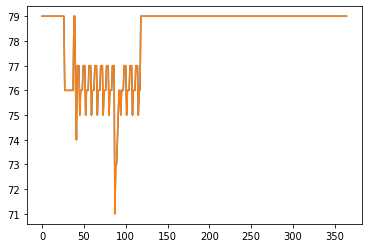

listing_id:  5203
difference in price and adjusted price:  0
max:  80.0
mean:  78.1120218579235
min:  75.0


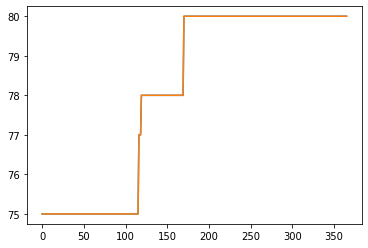

listing_id:  5238
difference in price and adjusted price:  0
max:  150.0
mean:  145.95890410958904
min:  125.0


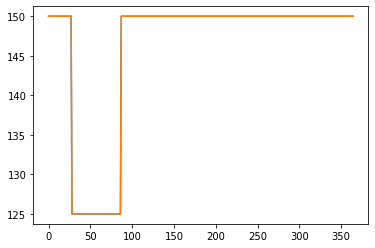

listing_id:  5441
difference in price and adjusted price:  0
max:  175.0
mean:  103.27945205479452
min:  85.0


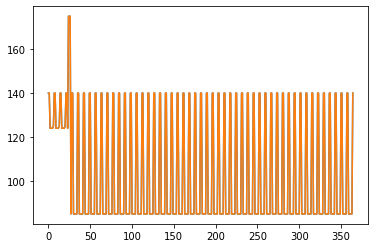

listing_id:  5803
difference in price and adjusted price:  0
max:  97.0
mean:  92.21643835616439
min:  88.0


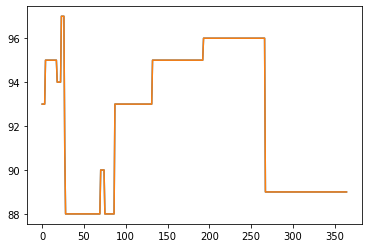

listing_id:  6090
difference in price and adjusted price:  0
max:  120.0
mean:  120.0
min:  120.0


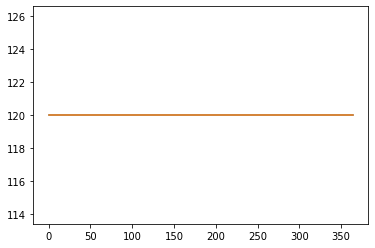

listing_id:  6848
difference in price and adjusted price:  0
max:  146.0
mean:  100.9672131147541
min:  99.0


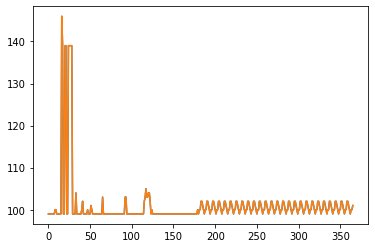

listing_id:  7097
difference in price and adjusted price:  0
max:  210.0
mean:  202.13424657534247
min:  199.0


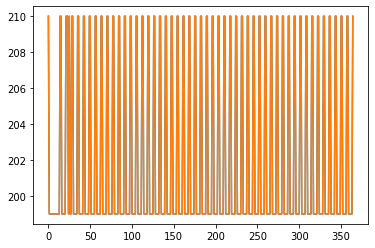

listing_id:  7322
difference in price and adjusted price:  0
max:  140.0
mean:  122.63013698630137
min:  120.0


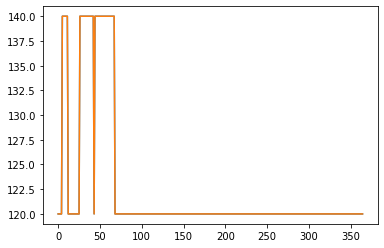

listing_id:  7726
difference in price and adjusted price:  0
max:  200.0
mean:  140.13698630136986
min:  139.0


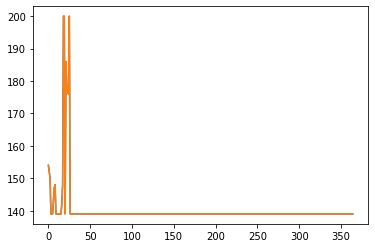

listing_id:  7750
difference in price and adjusted price:  0
max:  190.0
mean:  190.0
min:  190.0


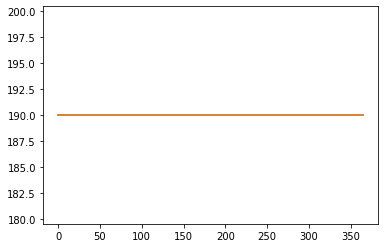

listing_id:  7801
difference in price and adjusted price:  0
max:  299.0
mean:  299.0
min:  299.0


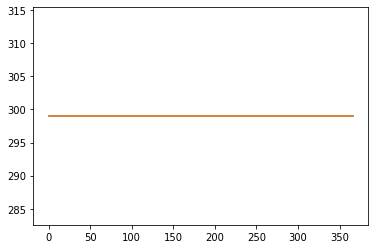

listing_id:  8024
difference in price and adjusted price:  0
max:  143.0
mean:  104.69041095890411
min:  100.0


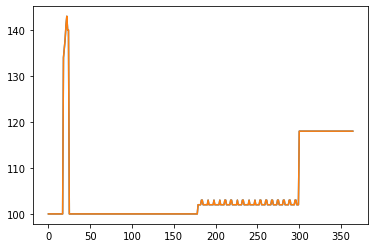

listing_id:  8025
difference in price and adjusted price:  0
max:  74.0
mean:  60.11506849315069
min:  56.0


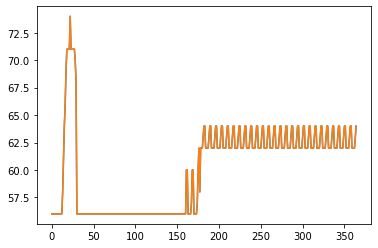

listing_id:  8110
difference in price and adjusted price:  0
max:  92.0
mean:  72.34520547945205
min:  70.0


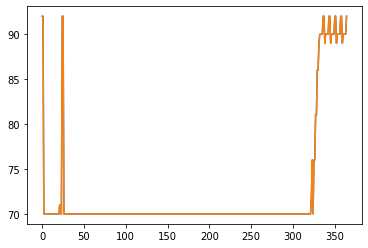

listing_id:  8490
difference in price and adjusted price:  0
max:  120.0
mean:  118.79452054794521
min:  100.0


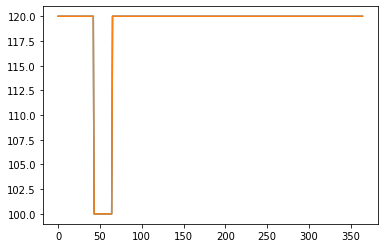

listing_id:  8505
difference in price and adjusted price:  0
max:  141.0
mean:  135.04657534246576
min:  135.0


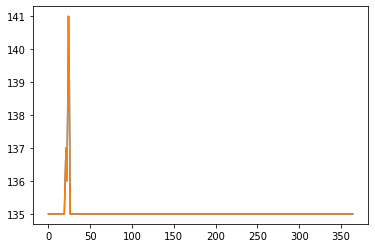

listing_id:  8700
difference in price and adjusted price:  0
max:  100.0
mean:  85.6986301369863
min:  80.0


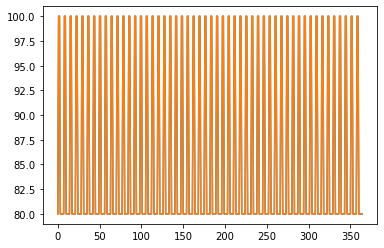

listing_id:  9518
difference in price and adjusted price:  0
max:  57.0
mean:  52.032876712328765
min:  52.0


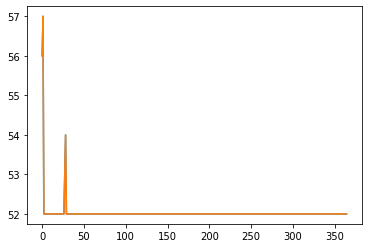

listing_id:  9657
difference in price and adjusted price:  0
max:  220.0
mean:  189.36986301369862
min:  180.0


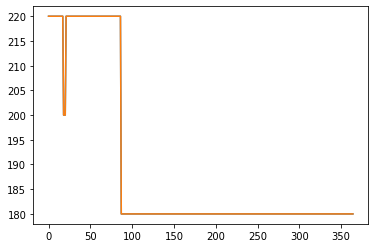

listing_id:  9668
difference in price and adjusted price:  0
max:  54.0
mean:  50.31232876712329
min:  49.0


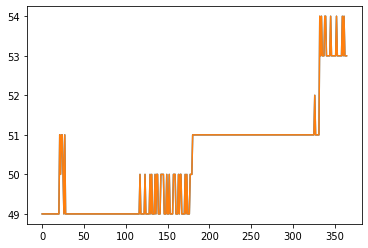

listing_id:  9704
difference in price and adjusted price:  0
max:  70.0
mean:  55.21095890410959
min:  52.0


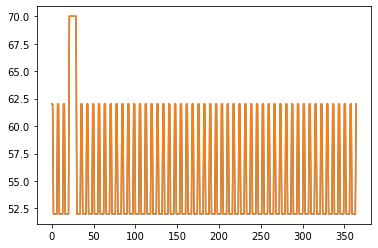

listing_id:  9782
difference in price and adjusted price:  0
max:  68.0
mean:  55.227397260273975
min:  55.0


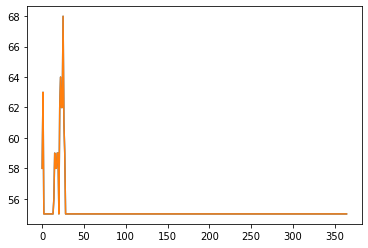

listing_id:  9783
difference in price and adjusted price:  0
max:  47.0
mean:  45.13661202185792
min:  45.0


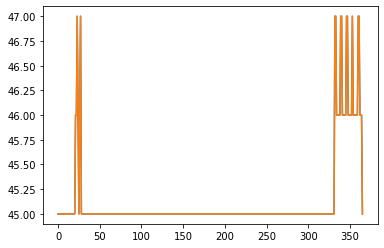

listing_id:  10452
difference in price and adjusted price:  0
max:  70.0
mean:  70.0
min:  70.0


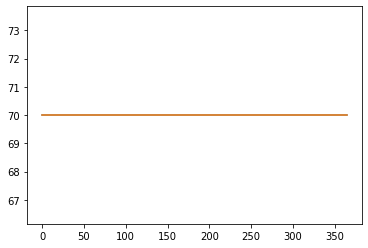

listing_id:  10962
difference in price and adjusted price:  0
max:  97.0
mean:  92.20821917808219
min:  88.0


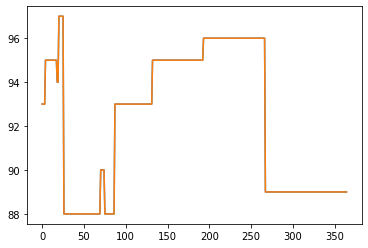

listing_id:  11174
difference in price and adjusted price:  0
max:  145.0
mean:  100.1013698630137
min:  83.0


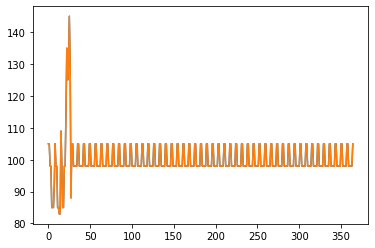

listing_id:  11708
difference in price and adjusted price:  0
max:  80.0
mean:  61.52602739726027
min:  59.0


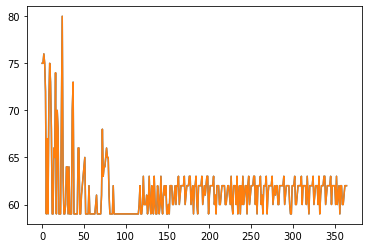

listing_id:  11943
difference in price and adjusted price:  0
max:  150.0
mean:  150.0
min:  150.0


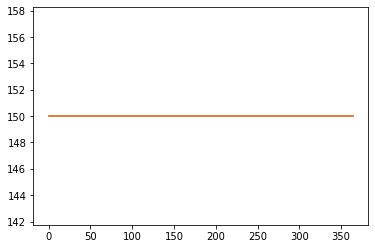

listing_id:  12048
difference in price and adjusted price:  0
max:  40.0
mean:  39.20765027322405
min:  35.0


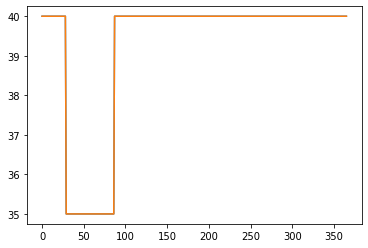

listing_id:  12192
difference in price and adjusted price:  0
max:  68.0
mean:  67.14794520547945
min:  60.0


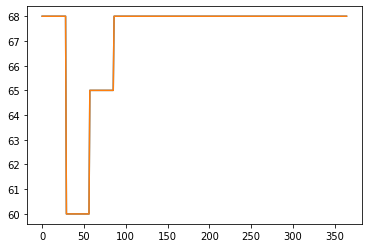

listing_id:  12318
difference in price and adjusted price:  0
max:  135.0
mean:  135.0
min:  135.0


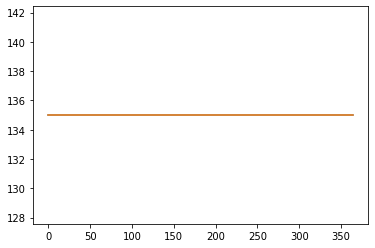

listing_id:  12343
difference in price and adjusted price:  0
max:  150.0
mean:  150.0
min:  150.0


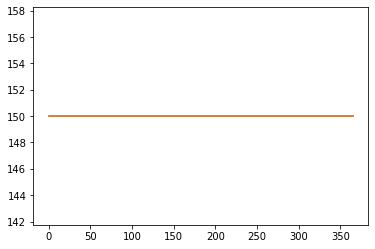

listing_id:  12627
difference in price and adjusted price:  0
max:  103.0
mean:  85.26027397260275
min:  85.0


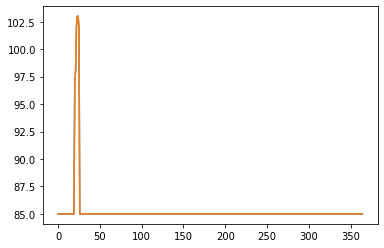

listing_id:  12937
difference in price and adjusted price:  0
max:  163.0
mean:  131.26575342465753
min:  130.0


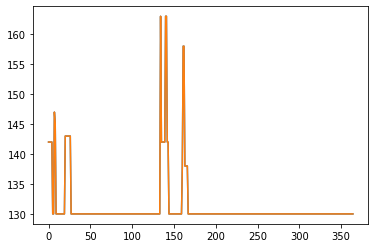

listing_id:  12940
difference in price and adjusted price:  0
max:  150.0
mean:  150.0
min:  150.0


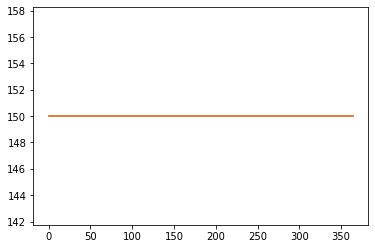

listing_id:  13050
difference in price and adjusted price:  0
max:  120.0
mean:  115.01366120218579
min:  115.0


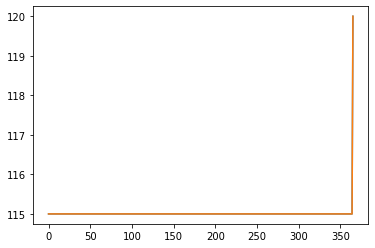

listing_id:  13394
difference in price and adjusted price:  0
max:  80.0
mean:  80.0
min:  80.0


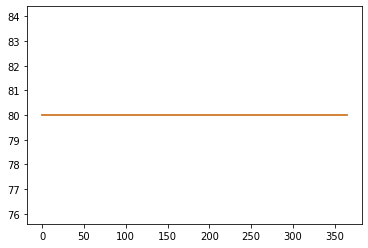

listing_id:  13808
difference in price and adjusted price:  0
max:  83.0
mean:  63.986301369863014
min:  63.0


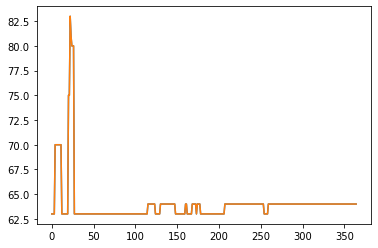

listing_id:  14287
difference in price and adjusted price:  0
max:  167.0
mean:  146.85479452054796
min:  92.0


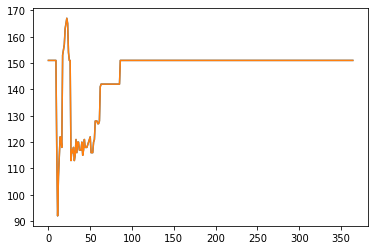

listing_id:  14290
difference in price and adjusted price:  0
max:  275.0
mean:  224.8958904109589
min:  194.0


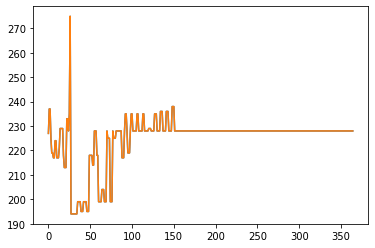

listing_id:  14314
difference in price and adjusted price:  0
max:  154.0
mean:  150.42465753424656
min:  149.0


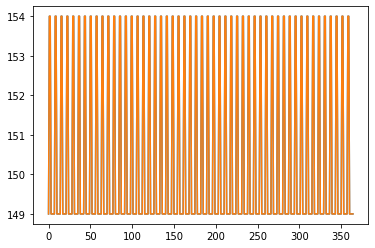

listing_id:  14322
difference in price and adjusted price:  0
max:  400.0
mean:  191.95890410958904
min:  120.0


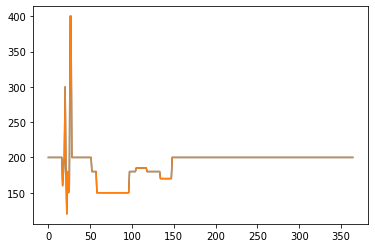

listing_id:  14377
difference in price and adjusted price:  0
max:  200.0
mean:  150.21917808219177
min:  150.0


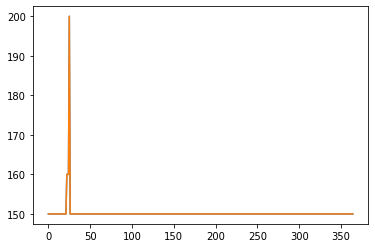

listing_id:  14468
difference in price and adjusted price:  0
max:  99.0
mean:  61.534246575342465
min:  59.0


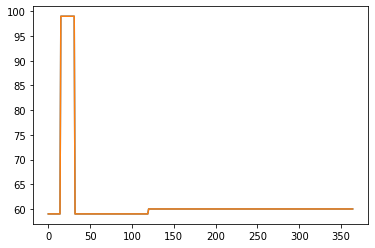

listing_id:  14991
difference in price and adjusted price:  0
max:  110.0
mean:  110.0
min:  110.0


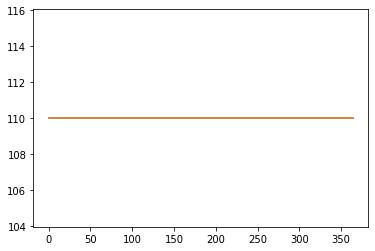

listing_id:  15220
difference in price and adjusted price:  0
max:  230.0
mean:  97.29508196721312
min:  69.0


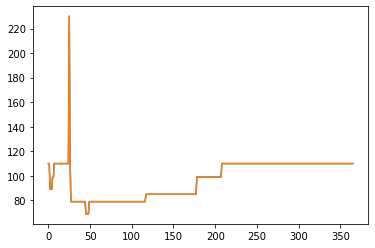

In [12]:
%matplotlib inline

count=0
for id_, grp in cal_listing_id_grp:
    print("listing_id: ",id_)
    print("difference in price and adjusted price: ", len(grp[grp['price'] != grp['adjusted_price']].index))
    grpp = grp['price'].tolist()
    print("max: ", max(grpp))
    print("mean: ",sum(grpp) / len(grpp))
    print("min: ", min(grpp))
    plt.plot(grpp)
    plt.plot(grp['adjusted_price'].tolist())
    plt.show()
    count += 1
    if count > 50: break

# Analysis of prices

In [22]:
ny_cal1 = pd.read_csv('data/calendar-6.csv')
print(ny_cal1.head())
ny_cal2 = pd.read_csv('data/calendar-5.csv')
print(ny_cal2.head())
ny_cal3 = pd.read_csv('data/calendar-3.csv')
print(ny_cal3.head())
ny_cal4 = pd.read_csv('data/calendar-4.csv')
print(ny_cal4.head())

   listing_id        date available price
0     3414653  2017-12-31         f   NaN
1     3414653  2017-12-30         f   NaN
2     3414653  2017-12-29         f   NaN
3     3414653  2017-12-28         f   NaN
4     3414653  2017-12-07         f   NaN
   listing_id        date available price
0    16457286  2018-01-11         f   NaN
1    16457286  2018-01-12         f   NaN
2    16457286  2018-01-13         f   NaN
3    16457286  2018-01-14         f   NaN
4    16457286  2018-01-15         f   NaN
   listing_id        date available    price adjusted_price  minimum_nights  \
0       19812  2019-12-05         f  $105.00        $105.00             3.0   
1        2595  2019-12-06         f  $175.00        $175.00            10.0   
2        2595  2019-12-07         f  $175.00        $175.00            10.0   
3        2595  2019-12-08         f  $175.00        $175.00            10.0   
4        2595  2019-12-09         f  $175.00        $175.00            10.0   

   maximum_nights  
0

In [24]:
ny_cal1.date = pd.to_datetime(ny_cal1.date)
ny_cal2.date = pd.to_datetime(ny_cal2.date)
ny_cal3.date = pd.to_datetime(ny_cal3.date)
ny_cal4.date = pd.to_datetime(ny_cal4.date)

In [25]:
# Merge the all datasets
ny_cal_X = pd.concat([ny_cal1, ny_cal2, ny_cal3, ny_cal4],
                    axis=0,
                    ignore_index=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [26]:
# Delete datasets to clear up memory
del ny_cal1
del ny_cal2
del ny_cal3
del ny_cal4

In [48]:
ny_cal_X = ny_cal_X.dropna()
print("date range: ", ny_cal_X.date.min(),", ", ny_cal_X.date.max())

date range:  2019-01-09 00:00:00 ,  2020-12-05 00:00:00


In [28]:
# Convert availability column to binary (1 = available)
ny_cal_X['available_bin'] = [
    1 if x == 't' else 0 for x in ny_cal_X.available
]

In [30]:
ny_cal_X.price = ny_cal_X['price'].apply(lambda s: get_float(s.replace(',', ''),'$'))

In [31]:
# Save for later
with open('data/ny_cal_X.pickle', 'wb') as to_write:
    pickle.dump(ny_cal_X, to_write)

In [32]:
# Average all prices by date
avg_df = ny_cal_X.groupby('date')[['price', 'adjusted_price']].mean()
avg_df.reset_index(inplace=True)

In [33]:
# Set up for modeling with Prophet
avg_df = avg_df.rename(columns={'date':'ds','price':'y'})

In [34]:
# Save for later
with open('data/ny_cal_avg_df.pickle', 'wb') as to_write:
    pickle.dump(avg_df, to_write)

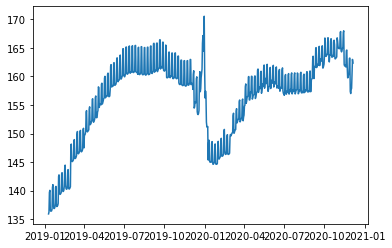

In [35]:
# Look at the data
plt.plot(avg_df.ds,avg_df.y)

## Analyzing data segments by price range

In [36]:
# Create df averaging for prices with prices from $0-$100 (average across listings to get this base price)
ny_cal_X = ny_cal_X.merge(pd.DataFrame(
    ny_cal_X.groupby('listing_id').price.mean()).reset_index(),
                            on='listing_id').rename(columns={
                                'price_x': 'price',
                                'price_y': 'base_price'
                            })

### Less than \$100

In [38]:
avg_0_100 = ny_cal_X[ny_cal_X.base_price < 100].groupby('date')[[
    'price', 'adjusted_price'
]].mean()
avg_0_100.reset_index(inplace=True)
avg_0_100 = avg_0_100.rename(columns={'date': 'ds', 'price': 'y'})

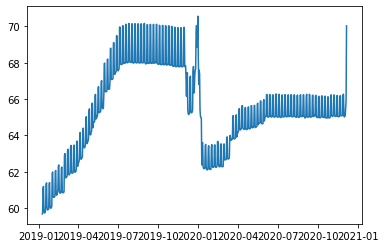

In [39]:
plt.plot(avg_0_100.ds, avg_0_100.y)

### 100 - 200

In [42]:
avg_100_200 = ny_cal_X[(ny_cal_X.base_price >= 100)
                        & (ny_cal_X.base_price < 200)].groupby('date')[[
                            'price', 'adjusted_price'
                        ]].mean()
avg_100_200.reset_index(inplace=True)
avg_100_200 = avg_100_200.rename(columns={'date': 'ds', 'price': 'y'})

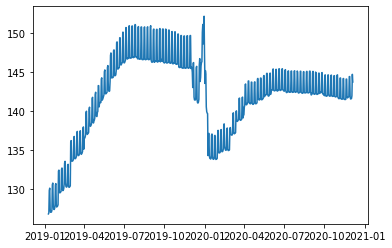

In [43]:
plt.plot(avg_100_200.ds, avg_100_200.y)

### \$200 and up

In [44]:
avg_200_up = ny_cal_X[(ny_cal_X.base_price >= 200)].groupby('date')[[
    'price', 'adjusted_price'
]].mean()
avg_200_up.reset_index(inplace=True)
avg_200_up = avg_200_up.rename(columns={'date': 'ds', 'price': 'y'})

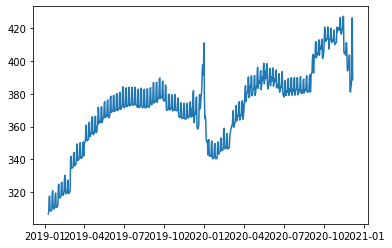

In [45]:
plt.plot(avg_200_up.ds, avg_200_up.y)

# Does holidays have effect on prices?

In [121]:
us_holidays = holidays.UnitedStates(state='NY', years=[2019, 2020])
holiday_names = []
holiday_dates = []
for holiday in list(us_holidays.items()):
    holiday_dates.append(holiday[0])
    holiday_names.append(holiday[1])

In [122]:
holidays_time = pd.DataFrame({
    'holiday': holiday_names,
    'ds': holiday_dates,
    'lower_window': -1,
    'upper_window': 1,
})

In [123]:
holidays_time.head()

,holiday,ds,lower_window,upper_window
0,New Year's Day,2019-01-01,-1,1
1,Martin Luther King Jr. Day,2019-01-21,-1,1
2,Lincoln's Birthday,2019-02-12,-1,1
3,Susan B. Anthony Day,2019-02-15,-1,1
4,Washington's Birthday,2019-02-18,-1,1


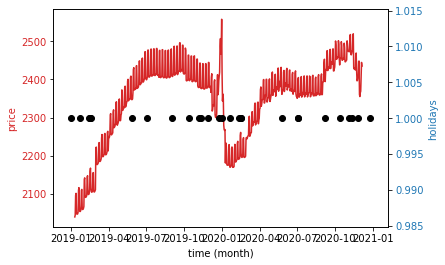

<Figure size 21600x2880 with 0 Axes>

In [142]:
fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(300,40))

color = 'tab:red'
ax1.set_xlabel('time (month)')
ax1.set_ylabel('price', color=color)
ax1.plot(avg_df.ds, avg_df.y * 15, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('holidays', color=color)  # we already handled the x-label with ax1
ax2.scatter(holidays_time.ds, holidays_time.upper_window, color='black')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Time Series analysis using Weather Data

### Instantiate model and fit to average price data

In [130]:
m = Prophet(yearly_seasonality=True, holidays=holidays_time)
m.add_country_holidays(country_name='US')
m.fit(avg_df)
avg_df.info()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 2 columns):
ds    697 non-null datetime64[ns]
y     697 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.0 KB


In [131]:
# Make future predictions going out 1 year
future = m.make_future_dataframe(periods=365)

In [132]:
# Fill out predictions
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1057,2021-12-01,156.817905,127.639635,189.359354
1058,2021-12-02,156.605675,127.173211,188.935507
1059,2021-12-03,160.038116,130.177262,192.000924
1060,2021-12-04,160.098535,130.059928,192.838159
1061,2021-12-05,156.129726,125.814546,188.562932


In [133]:
# Convert weekly, holidays, and yearly changes to percentages
forecast['weekly_percentage'] = forecast.weekly / forecast.trend
forecast['holiday_percentage'] = forecast.holidays / forecast.trend
forecast['yearly_percentage'] = forecast.yearly / forecast.trend

In [134]:
# Save for making predictions in flask app
forecast.to_csv('ny_forecast.csv')

In [136]:
# Extract relevant info for price estimates
price_change_df = forecast[[
    'ds', 'weekly_percentage', 'holiday_percentage', 'yearly_percentage'
]]

In [137]:
# Save for plotting
with open('data/lax_price_change_df.pickle', 'wb') as to_write:
    pickle.dump(price_change_df, to_write)
price_change_df.to_csv('lax_price_change_df.csv')

In [138]:
# Extract relevant info for price estimates
price_change_df = forecast[[
    'ds', 'weekly_percentage', 'holiday_percentage', 'yearly_percentage'
]]

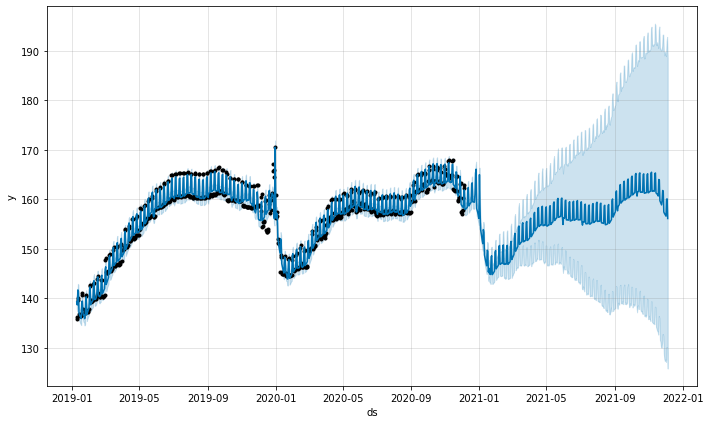

In [139]:
# Plot predictions
fig1 = m.plot(forecast)

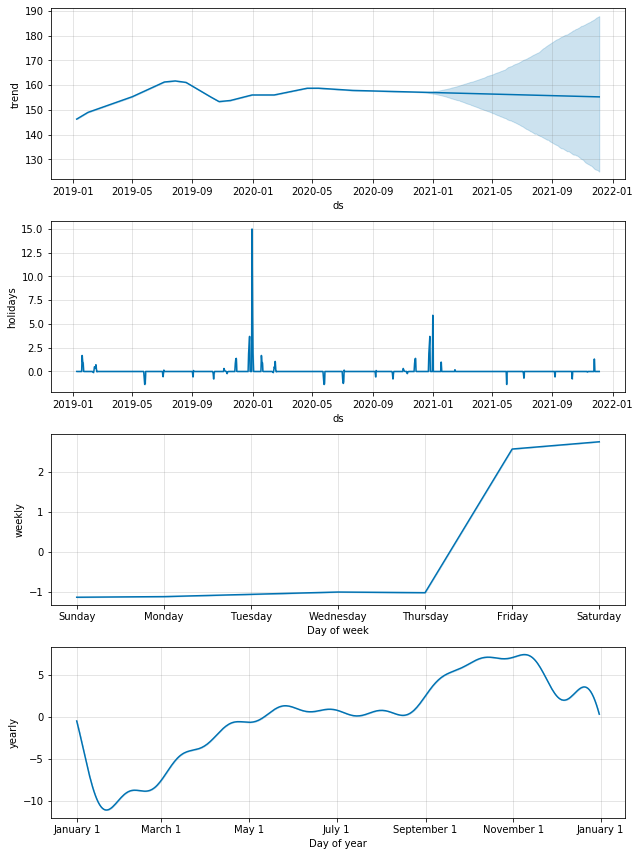

In [140]:
# Plot time-based components
fig2 = m.plot_components(forecast)

# Weather Data

In [81]:
weather = pd.read_excel("data/weather_data/weather_output.xlsx")

In [82]:
weather.head()

,Unnamed: 0,LATITUDE,LONGITUDE,DATE,AWND,PRCP,TMIN,TMAX,SNOW,TAV,TDIFF,MONTH_YEAR,RTAV,Weather_type,TAV_Month,TDIFF_Month,TSNOW_Month
0,0,40.77898,-73.96925,2013-01-01,3.1,0.0,-3.3,4.4,0.0,0.55,7.7,2013-01,1,cold,1.71129,17.2,38
1,1,40.77898,-73.96925,2013-01-04,3.6,0.0,-1.1,2.8,0.0,0.85,3.9,2013-01,1,cold,1.71129,17.2,38
2,2,40.77898,-73.96925,2013-01-16,2.2,17.5,0.0,2.8,0.0,1.40,2.8,2013-01,1,cold,1.71129,17.2,38
3,3,40.77898,-73.96925,2013-01-02,2.6,0.0,-5.6,0.6,0.0,-2.50,6.2,2013-01,-2,freezing,1.71129,17.2,38
4,4,40.77898,-73.96925,2013-01-03,2.0,0.0,-4.4,0.0,0.0,-2.20,4.4,2013-01,-2,freezing,1.71129,17.2,38


In [83]:
weather = weather[['MONTH_YEAR','TAV_Month']]
weather.columns=['date','tav']
weather = weather.drop_duplicates('date')
weather.reset_index(inplace=True)

In [84]:
weather['date'] = pd.to_datetime(weather.date)
print(weather.head())
weather_19_20 = weather[weather['date'] >= pd.to_datetime('2019-01')]

   index       date       tav
0      0 2013-01-01  1.711290
1     31 2013-02-01  1.064286
2     59 2013-03-01  4.519355
3     90 2013-11-01  7.383333
4    120 2013-12-01  3.672581


In [85]:
weather_19_20 = weather_19_20.rename(columns={'date': 'ds', 'tav': 'y'})

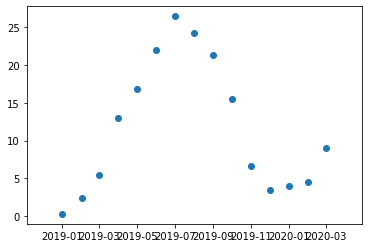

In [89]:
plt.scatter(weather_19_20.ds, weather_19_20.y)

## Time Series analysis using Weather Data

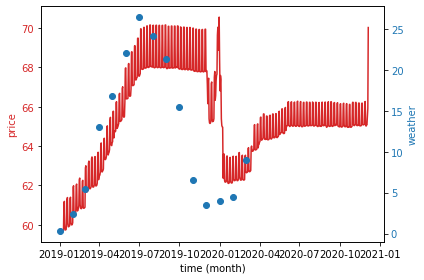

In [92]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (month)')
ax1.set_ylabel('price', color=color)
ax1.plot(avg_0_100.ds, avg_0_100.y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('weather', color=color)  # we already handled the x-label with ax1
ax2.scatter(weather_19_20.ds, weather_19_20.y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()